<a href="https://colab.research.google.com/github/maryembenghouma/Freelance-Project/blob/main/work_Notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Préparation du dataset


Importation Des Bibliothéques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, Sequential

#biblio pour les images
from PIL import Image

import os

importation du data ( texte)

In [ ]:
# Charger le fichier CSV en utilisant pandas
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [ ]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [ ]:
data.iloc[0].product_specifications

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [ ]:
data.shape

(1050, 15)

In [ ]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

Objectif : charger les images a partir du dossier et les mettre selon le nom de chaque image  donner dans la colonne image

In [ ]:
import os
from PIL import Image

# Chemin relatif vers le dossier contenant les images
dossier_images = "Images"

# Charger chaque image dans une liste
images = []
for image_name in data['image']:
    chemin_image = os.path.join(dossier_images, image_name)
    image = Image.open(chemin_image)
    images.append(image)


C:\Users\Mariem\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


*** Verifier si les images sont chargé

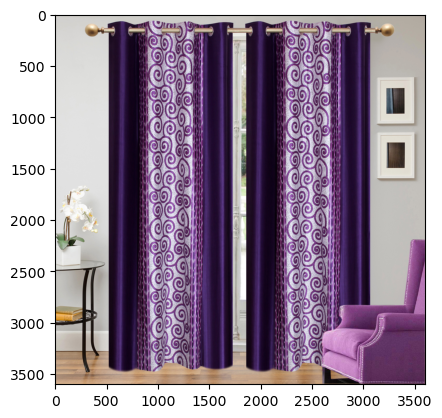

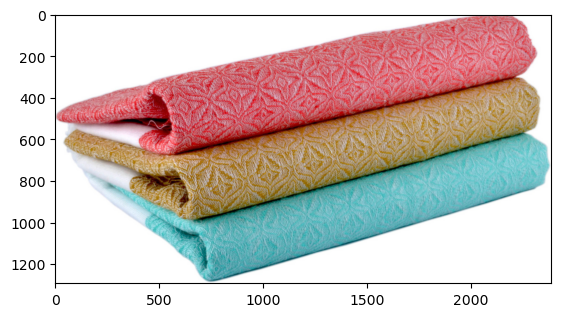

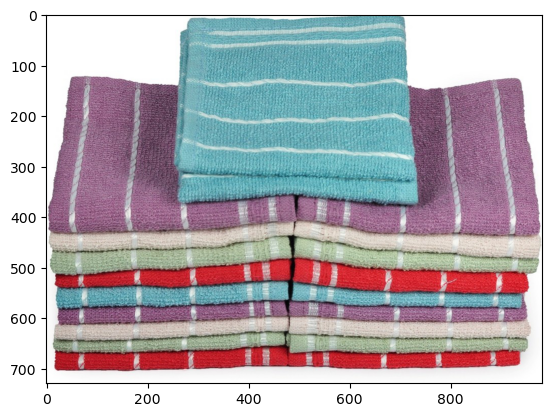

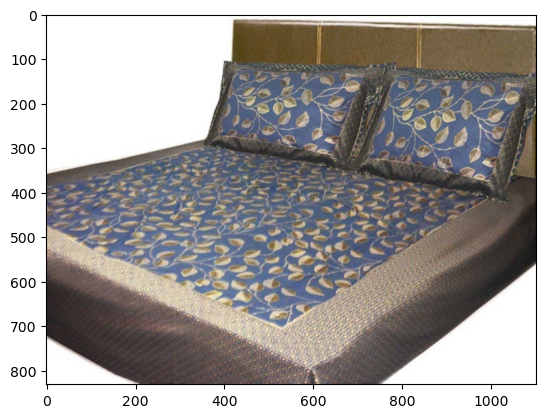

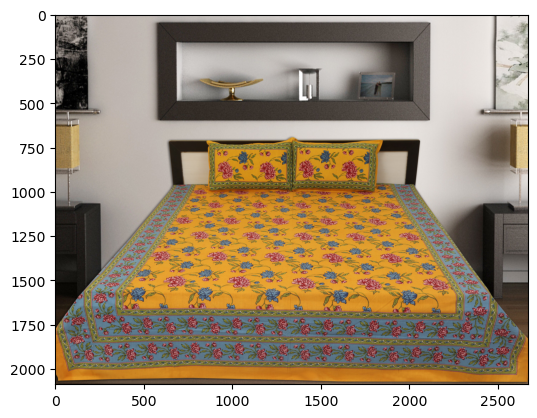

In [ ]:
import matplotlib.pyplot as plt

# Afficher les cinq premières images chargées
for i in range(5):
    plt.imshow(images[i])
    plt.show()


RMQ :===> les images n'ont pas les méme dimension

# ** Traitement du data ( sachant data contient texte et des images donc on va faire un double traitement )

****** Etude des descriptions Textuelles ********

In [ ]:
import pandas as pd


df = pd.DataFrame(data)

# Vérification des valeurs manquantes
missing_values = df['description'].isnull().sum()

# Vérification des doublons
duplicate_values = df.duplicated(subset='description').sum()

# Vérification des mots vides
empty_values = df['description'].str.strip().eq('').sum()

# Vérification de la ponctuation
punctuation_values = df['description'].str.contains('[^\w\s]').sum()

# Vérification de la longueur des descriptions
description_length = df['description'].str.len()

# Affichage des résultats
print("Valeurs manquantes:", missing_values)
print("Doublons:", duplicate_values)
print("Mots vides:", empty_values)
print("Ponctuation:", punctuation_values)
print("Longueur des descriptions:")
print(description_length)


Valeurs manquantes: 0
Doublons: 0
Mots vides: 0
Ponctuation: 1049
Longueur des descriptions:
0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: description, Length: 1050, dtype: int64


Interprétation :

* 1.Valeurs manquantes : Il n'y a aucune valeur manquante dans la colonne des descriptions.
* 2.Doublons : Il n'y a aucun doublon parmi les descriptions.
* 3.Mots vides : Aucune description ne contient uniquement des espaces ou est vide.
* 4.Ponctuation : Il y a un total de 1049 occurrences de caractères de ponctuation dans l'ensemble des descriptions.
* 5.Longueur des descriptions : La longueur des descriptions varie considérablement, allant de 210 à 2432 caractères.

Price de Décision :
* ==>la présence d'une quantité significative de ponctuation dans les descriptions peut nécessiter une attention
lors du prétraitement des données textuelles, notamment en ce qui concerne la suppression ou la gestion appropriée de la ponctuation.

* ==> La variation de la longueur des descriptions indique également que des méthodes de normalisation ou de traitement de la longueur peuvent être nécessaires pour garantir une analyse cohérente des données.



******* prétraitement des données textuelles **************

In [ ]:
# Vérifier s'il y a des valeurs manquantes dans toute la data
missing_values = data.isnull().sum()
print("Valeurs manquantes dans chaque colonne :\n", missing_values)


Valeurs manquantes dans chaque colonne :
 uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64


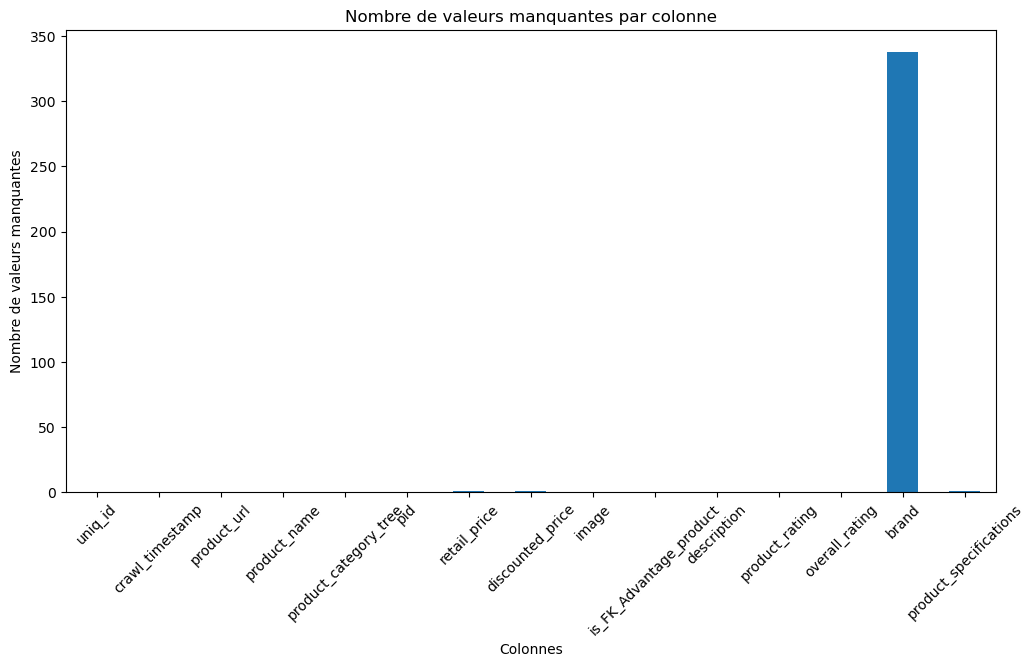

In [ ]:
import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Créer un graphique
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()


==> on remarque que brand contient presque 350 valeurs manquantes

* price de décision :
=> le brand de la marque joue un role cruciale donc on va remplir les colonnes ayant des valeurs manquantes par la brand la plus fréqunetes d'ou lors du traitement on va faire une "imputation par la valeur la plus fréquente"

In [ ]:
most_frequent_brand = data['brand'].value_counts().idxmax()
print("La marque la plus fréquente est :", most_frequent_brand)


La marque la plus fréquente est : PRINT SHAPES


In [ ]:
# remplir les colonnes vides par la brand la plus fréquente
data['brand'] = data['brand'].fillna(most_frequent_brand)


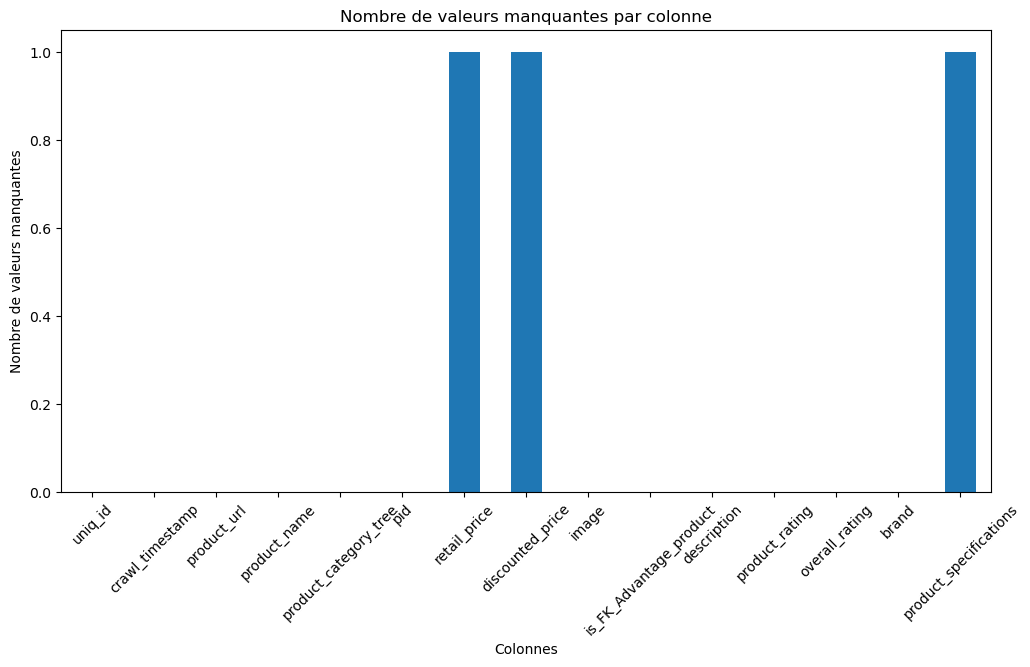

In [ ]:
#vérifiant maintenat si on a encore des valeurs manquantes
import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Créer un graphique
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()


remarque : apres avoir faire l'imputation du brand on remarque qu'il se crée des valeurs manquantes dans les 3 colonnes retail_price, discounted_priceetproduct_specifications qui sont moins important que brand doonc pour corriger ca on va faire une imputation par médiane dans les 3  colonnes.   

In [ ]:
# Imputation pour 'discounted_price' et 'retail_price'
data['discounted_price'].fillna(data['discounted_price'].median(), inplace=True)
data['retail_price'].fillna(data['retail_price'].median(), inplace=True)

# Imputation pour 'product_specifications'
most_frequent_spec = data['product_specifications'].mode()[0]
data['product_specifications'].fillna(most_frequent_spec, inplace=True)


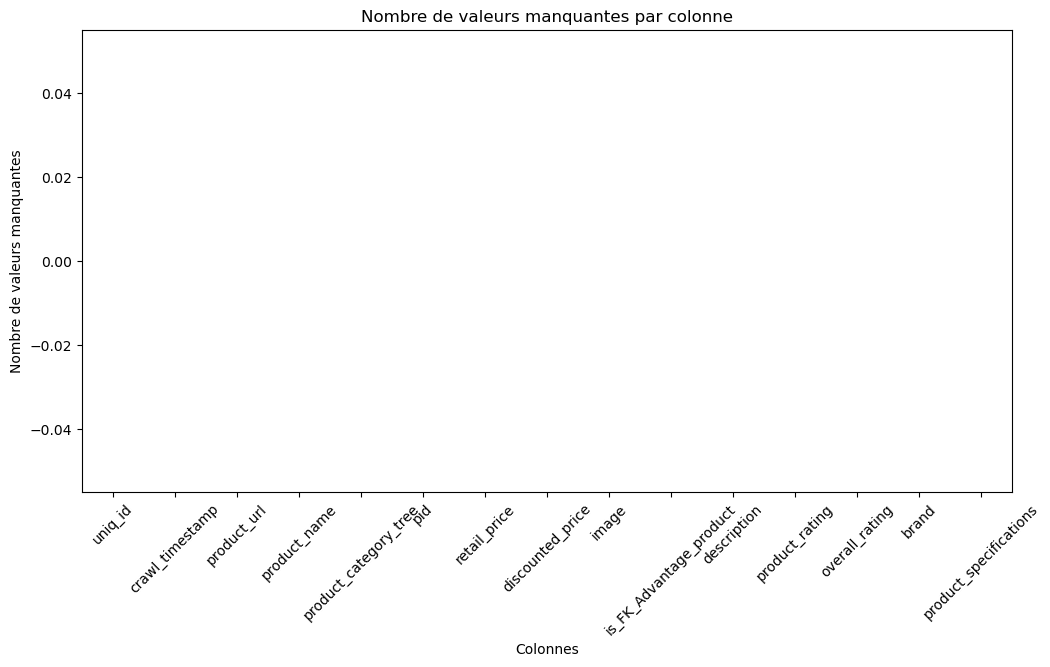

In [ ]:
#vérifiant s'il ya encore des valeurs manquantes

import matplotlib.pyplot as plt

# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Créer un graphique
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()


# etape 2 # nettoyage des descriptions #

In [ ]:
import pandas as pd
import re

# Fonction pour nettoyer le texte
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Supprimer les balises HTML
    text = re.sub(r'http\S+', '', text)  # Supprimer les URLs
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Supprimer les caractères spéciaux sauf les lettres et les chiffres
    return text.strip()  # Supprimer les espaces au début et à la fin

# Colonnes à nettoyer
columns_to_clean = ['product_name', 'product_category_tree', 'description', 'brand', 'product_specifications']



# Nettoyer les colonnes textuelles
for column in columns_to_clean:
    if data[column].dtype == 'object':
        data[column] = data[column].apply(clean_text)


In [ ]:
data.shape

(1050, 15)

# Prétraitement des images

* Redimensionnement des images

In [ ]:
import os
from PIL import Image

# Chemin relatif vers le dossier contenant les images originales
dossier_images_originales = "Images"
# Chemin relatif vers le nouveau dossier pour sauvegarder les images redimensionnées
dossier_images_redimensionnees = "Images_Redimensionnees"

# Créer le nouveau dossier s'il n'existe pas déjà
if not os.path.exists(dossier_images_redimensionnees):
    os.makedirs(dossier_images_redimensionnees)

nouvelle_taille = (224, 224)  # Taille souhaitée
for image_name in os.listdir(dossier_images_originales):
    chemin_image_originale = os.path.join(dossier_images_originales, image_name)
    chemin_image_redimensionnee = os.path.join(dossier_images_redimensionnees, image_name)
    with Image.open(chemin_image_originale) as image:
        image_redimensionnee = image.resize(nouvelle_taille)
        # Enregistrer l'image redimensionnée dans le nouveau dossier
        image_redimensionnee.save(chemin_image_redimensionnee)


C:\Users\Mariem\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


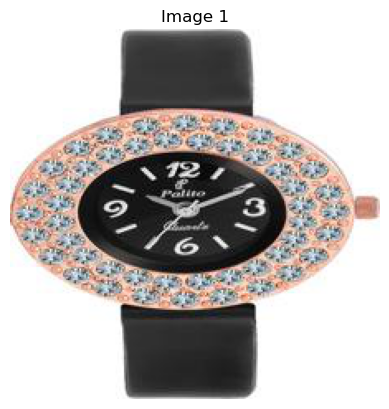

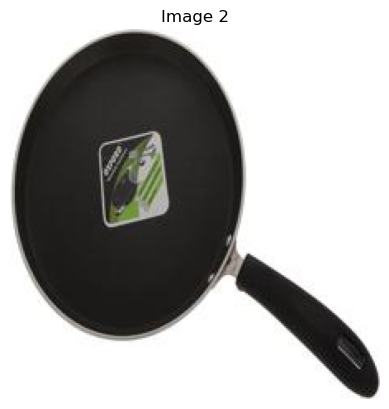

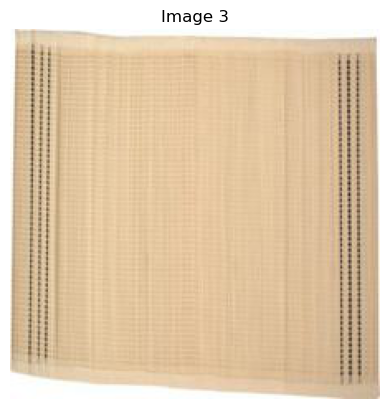

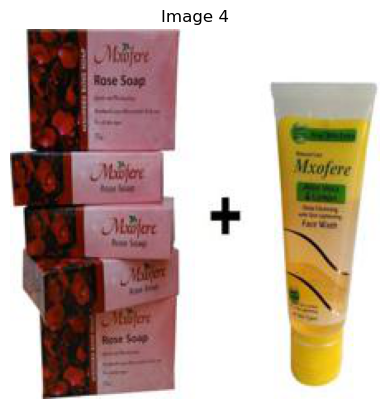

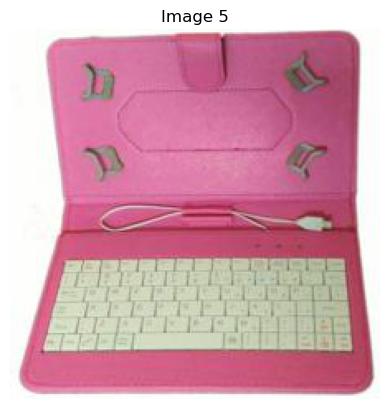

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Chemin relatif vers le dossier contenant les images redimensionnées
dossier_images_redimensionnees = "Images_Redimensionnees"

# Charger les cinq premières images redimensionnées
for i, image_name in enumerate(os.listdir(dossier_images_redimensionnees)):
    if i >= 5:
        break
    chemin_image_redimensionnee = os.path.join(dossier_images_redimensionnees, image_name)
    with Image.open(chemin_image_redimensionnee) as image:
        plt.imshow(image)
        plt.title(f"Image {i+1}")
        plt.axis('off')
        plt.show()


* normaliser les valeurs des pixels des images ( => pour assurer une convergence rapide Lors de l'entraînement de modèles d'apprentissage automatique)

In [ ]:
# 1er etape : charger les images redimensioné dans la colonne image

import os
from PIL import Image

# Chemin relatif vers le dossier contenant les images redimensionnées
dossier_images_redimensionnees = "Images_Redimensionnees"

# Charger chaque image redimensionnée dans la colonne 'image'
for i, image_name in enumerate(os.listdir(dossier_images_redimensionnees)):
    chemin_image = os.path.join(dossier_images_redimensionnees, image_name)
    data.at[i, 'image'] = Image.open(chemin_image)

# Vérifier que les images ont bien été chargées
print(data['image'].head())


0    <PIL.JpegImagePlugin.JpegImageFile image mode=...
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...
Name: image, dtype: object


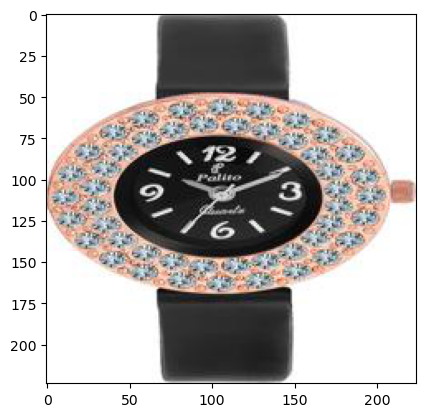

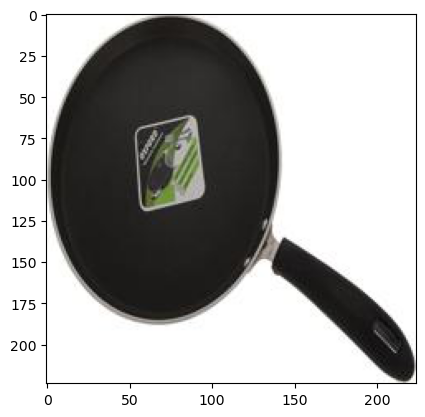

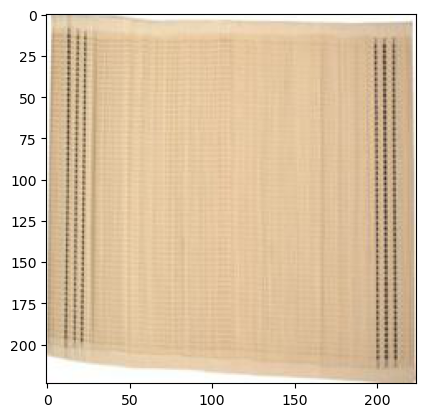

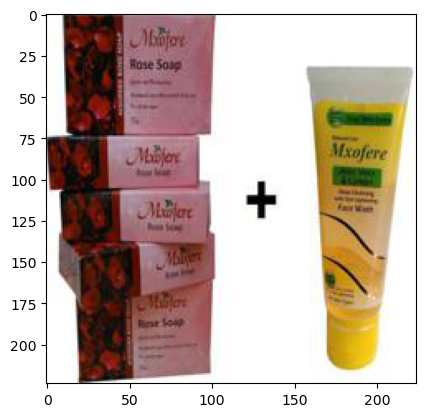

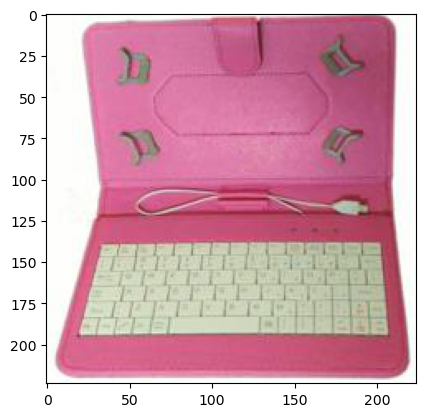

In [ ]:
import matplotlib.pyplot as plt

# Afficher les cinq premières images chargées
for i in range(5):
    plt.imshow(data['image'][i])
    plt.show()


==> donc le chargement et le redimensionnement des images a bien reuci on va donc faire maintenant la normalisation

In [ ]:
import numpy as np

# Normaliser les valeurs des pixels des images dans la colonne 'image'
data['image'] = data['image'].apply(lambda x: np.array(x) / 255.0)

# Vérifier les dimensions d'une image normalisée
print("Dimensions de la première image normalisée:", data['image'][0].shape)


Dimensions de la première image normalisée: (224, 224, 3)


* Interprétation :
    cette resultat implique l'image a été redimensionnée en une image de 224 pixels de largeur,
    224 pixels de hauteur et 3 canaux de couleur (RGB).
* ==>    La normalisation a donc été appliquée avec succès aux valeurs des pixels de l'image.






# Extraction de features

rmq : pour extraire des caractéristiques des images on va utiliser  un réseau de neurones convolutif (CNN) pré-entraîné, comme VGG16

In [ ]:
# Charger le modèle VGG16 pré-entraîné
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import numpy as np
import os

# Chemin relatif vers le dossier contenant les images
dossier_images = "Images_Redimensionnees"

# Liste pour stocker les features de toutes les images
all_features = []

# Boucler à travers chaque image et extraire les features
for image_name in os.listdir(dossier_images):
    img_path = os.path.join(dossier_images, image_name)
    x = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    all_features.append(features.flatten())

# Convertir la liste en un tableau numpy
all_features = np.array(all_features)

# Afficher les dimensions du tableau de features
print("Dimensions du tableau de features:", all_features.shape)

1/1 [==============================] - 0s 307ms/step
Dimensions du tableau de features: (1050, 25088)


* => on remarque que le nombre de features extraites par l'utilisation de VGG16 est élevé 25088 d'ou pour réduire la dimensionnalit on va appliquer une PCA  pour passer de 25088 a 100  feature de chaque image

In [ ]:
#from sklearn.decomposition import PCA

# Réduire la dimensionnalité à 100 composantes principales
#pca = PCA(n_components=100)
#reduced_features = pca.fit_transform(all_features)

# Afficher les dimensions du tableau de features réduit
#print("Dimensions du tableau de features réduit:", reduced_features.shape)


rmq : d'apres le sujet de projet on va Réduisez les features extraites en 2 dimensions à l'aide de PCA.


In [ ]:
from sklearn.decomposition import PCA


# Réduire en 2 dimensions avec PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(all_features)


2eme etape : Tracant un graphique 2D où chaque point représente un produit,
    en utilisant les deux dimensions obtenues à l'étape précédente.
  ============>  La couleur de chaque point correspondra à la catégorie réelle de l'article.
  rmq ( product category_ tree ==> cettte colonne contient les catégories des produits



Explication des étapes a faire  :
   * 1er etape  : on va faire un encodage  afin  de  convertir les catégories réelles de nos produits en valeurs numériques
    
   * 2eme etape :  on va associer les couleurs des points du graphique aux catégories.

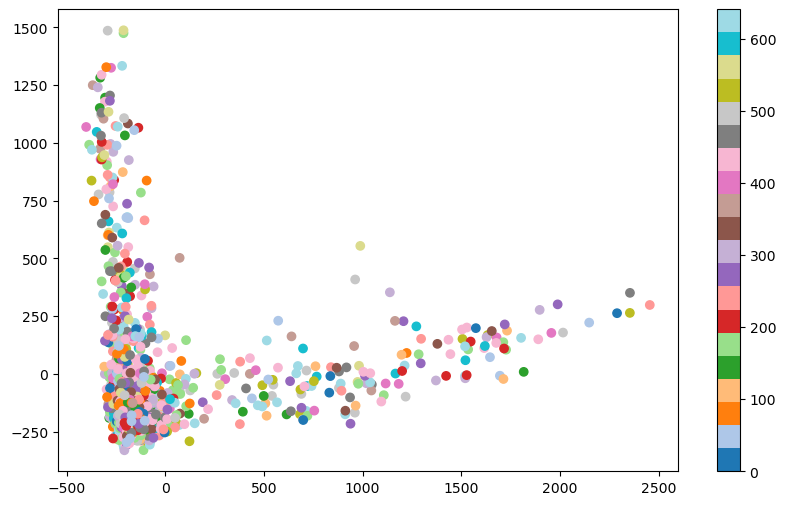

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Encoder les catégories en valeurs numériques## ( car on va les utiliser pour la modélisation et la plupart des modéles work on numerical values )
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(data['product_category_tree'])

# Créer un graphique 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=encoded_labels, cmap='tab20')
plt.colorbar()
plt.show()

====> rmq : chaque couleur représente une catégorie

Interprétation :
  * 3eme etape : Analyse visuel du grahique ( étape importante pour savoir  s'il est possible de regrouper automatiquement des     produits de même catégorie)
  * d'apres le graphe qu'on a obtenu les couleurs semblent proches Cela rend difficile la distinction visuelle des différentes        catégories, surtout pour les points qui se chevauchent.

  * => Donc on va les regrouper en clusters .( notions de clustering : basé sur la similarité ) => utilisation de K_means  

C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

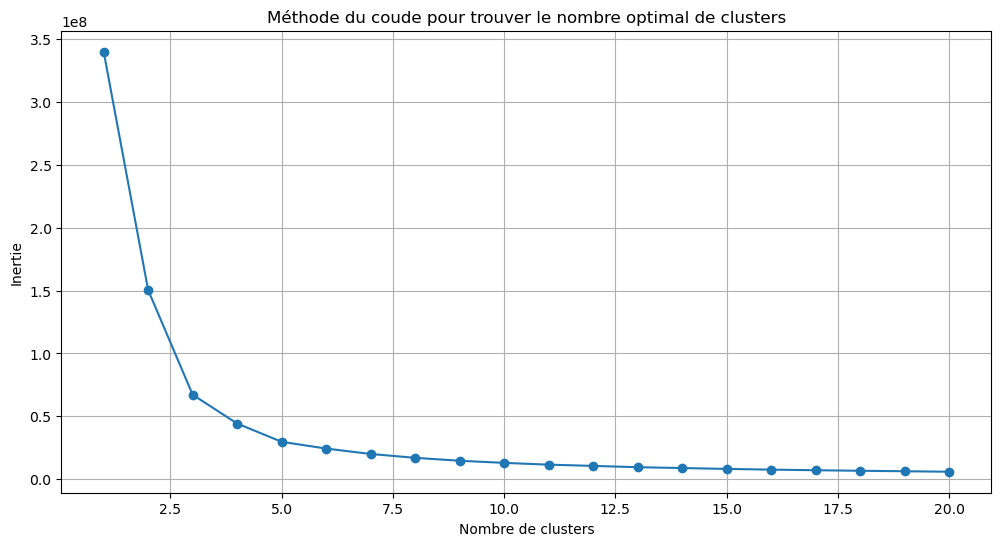

In [ ]:
# 1er etape : on va calculer le nombre optimal de clusters ( a l'aide de la méthode de coude ) qui consiste a trouver le point de coude
#rmq :  le point du coude dans le graphique est  le point où l'inertie commence à diminuer de manière linéaire.
# ==> Ce point on peut le considéré comme le nombre optimal de clusters .


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
nombre_de_clusters = range(1, 21)  # Tester pour un nombre de clusters de 1 à 20

for k in nombre_de_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_features)
    inertias.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.figure(figsize=(12, 6))
plt.plot(nombre_de_clusters, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.grid(True)
plt.show()


interprétation : d'apres le graphique on peut estimer que le nombre de clusters est entre 3 et 5

C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

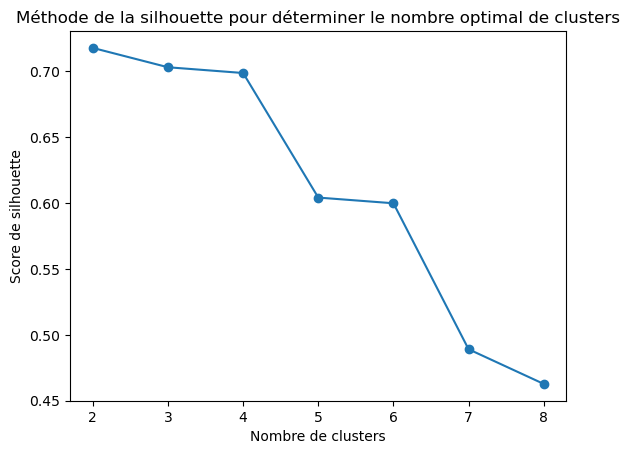

Le nombre optimal de clusters est : 2


In [ ]:
# 2eme méthode des silhouette ( pour trouver le nbre de clusters )

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Essayer différents nombres de clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Calculer le score de silhouette pour chaque nombre de clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_features)
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Trouver le nombre optimal de clusters qui maximise le score de silhouette
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# Tracer le graphique du score de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Méthode de la silhouette pour déterminer le nombre optimal de clusters')
plt.show()

print("Le nombre optimal de clusters est :", optimal_n_clusters)


=> cette méthode est plus précise ( le nombre optimal est le point où le score de silhouette est le plus élevé.)

C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Mariem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


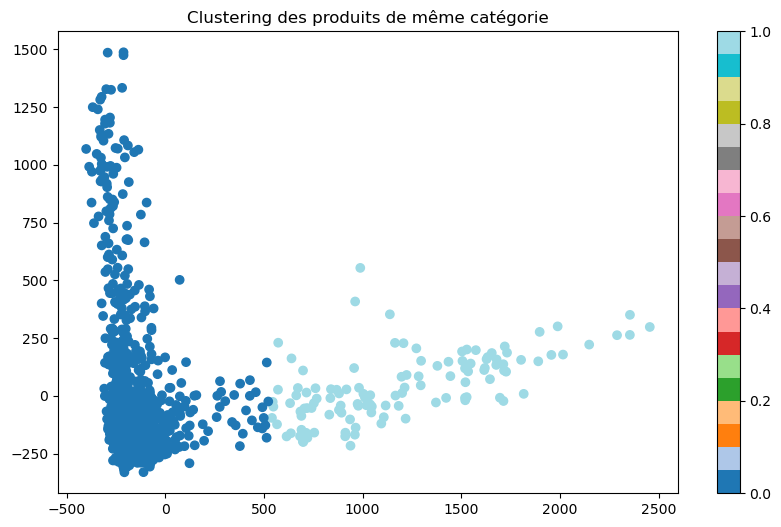

In [ ]:
 # KMeans avec le nombre optimal de clusters =2

optimal_n_clusters = 2
kmeans = KMeans(n_clusters=optimal_n_clusters)
clusters = kmeans.fit_predict(reduced_features)

# Afficher les clusters sur le graphique 2D
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='tab20')
plt.colorbar()
plt.title('Clustering des produits de même catégorie')
plt.show()
